# Упражнения
В этом упражнении рассматривается прогноз SARIMA, аналогичный тому, который был сделан для набора данных $CO_2$.



In [46]:
!pip install pmdarima

In [48]:
# 
import pandas as pd
import numpy as np
%matplotlib inline

# импорт SARIMAX 
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # для определения (p,q) 
from statsmodels.tsa.seasonal import seasonal_decompose      # для ETS графиков
from pmdarima import auto_arima                              # для поиска ARIMA моделей

# метрики
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# для игнорирования предупреждений (опционально)
# import warnings
# warnings.filterwarnings("ignore")

# Загрузка датасета
df = pd.read_csv('HospitalityEmployees.csv',index_col='Date',parse_dates=True)

In [49]:
df.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [50]:
df.index.freq = 'MS' #создаем индекс с частотой начала месяца
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


В <tt>df</tt>  348 записей и 1 колонка. Данные представляют собой численность сотрудников в тысячах человек в среднем за месяц с января 1990 года по декабрь 2018 года.

### 1. Постройте график временного ряда


[Text(0.5, 0, ''), Text(0, 0.5, 'Thousands of Persons')]

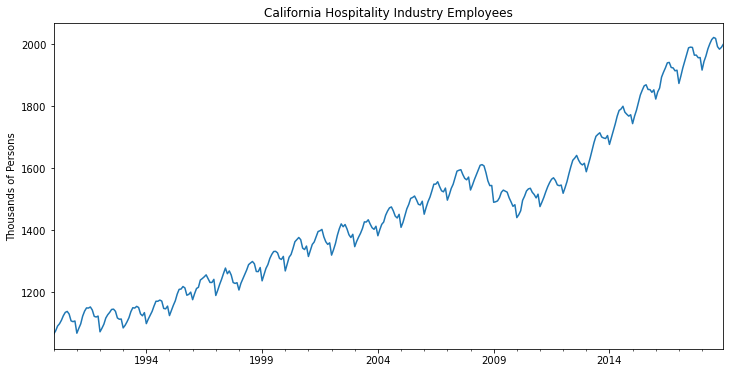

In [24]:
title = 'California Hospitality Industry Employees' 
ylabel = 'Thousands of Persons' 
xlabel = '' 
ax = df['Employees'].plot(figsize=(12,6),title=title) 
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

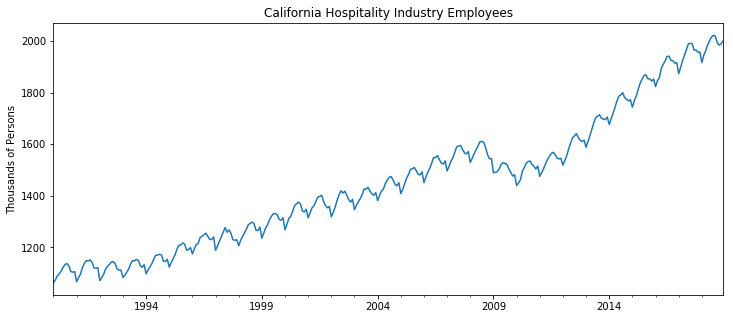

In [2]:
# 

### 2. Выполните ETS декомпозицию
Используя аддитивную модель ('additive').

In [57]:
r = seasonal_decompose(df['Employees'],model='additive')

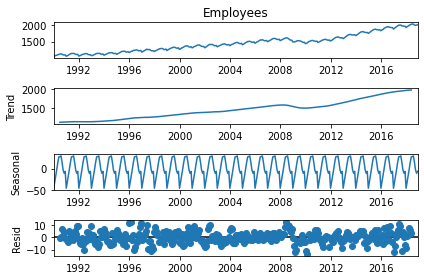

In [58]:
r.plot();

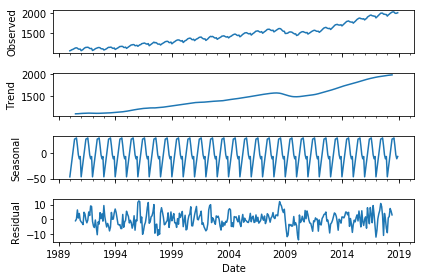

In [3]:
# 

### 3. Запустите <tt>pmdarima.auto_arima</tt> чтобы получить набор параметров
Это может занять некоторое время, так как необходимо оценить множество комбинаций.

In [27]:
r = seasonal_decompose(df['Employees'],model='additive') 

In [28]:
auto_arima(df['Employees'],seasonal=True,m=12).summary()

C:\Users\Lenovo\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,1,1)(1,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 508, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 690, in fit
    mlefit = super(MLEModel, self).fit(star

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Sat, 18 Dec 2021   AIC                           2208.504
Time:                                      17:50:58   BIC                           2231.600
Sample:                                           0   HQIC                          2217.700
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.507      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.542      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.149      0.032       0.011       0.246
ar.S.L12       0.9972      0.001    705.101      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.326      0.000      -0.834      -0.664
sigma2        29.2990      1.717     17.060      0.000      25.933      32.665
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Ожидаемый результат ARIMA (0,1,0) с сезонностью (2,0,0,12).
### 4. Разделите данные на train/test 
Установите один год (12 записей) для тестирования. Есть несколько способов сделать это!

In [29]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### 5. Обучите SARIMA(0,1,0)(2,0,0,12) на train

In [21]:
model = SARIMAX(train['Employees'],order=(1, 1, 2),seasonal_order=(1, 0, 1, 12))
results = model.fit()
results.summary()

/Users/vladimirivanov/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Sun, 07 Mar 2021   AIC                           2128.116
Time:                                      09:40:02   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.044     21.235      0.000       0.839       1.009
ma.L1         -0.9583      0.070    -13.634      0.000      -1.096      -0.821
ma.L2          0.1497      0.061      2.456      0.014       0.030       0.269
ar.S.L12       0.9973      0.001    731.206      0.000       0.995       1.000
ma.S.L12      -0.7519      0.044    -17.166      0.000      -0.838      -0.666
sigma2        28.7622      1.684     17.079      0.000      25.462      32.063
===================================================================================
Ljung-Box (Q):                       29.90   Jarque-Bera (JB):                73.33
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
model = SARIMAX(train['Employees'],order=(1, 1, 2),seasonal_order=(1, 0, 1, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Sun, 07 Mar 2021   AIC                           2128.116
Time:                                      09:40:10   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.044     21.235      0.000       0.839       1.009
ma.L1         -0.9583      0.070    -13.634      0.000      -1.096      -0.821
ma.L2          0.1497      0.061      2.456      0.014       0.030       0.269
ar.S.L12       0.9973      0.001    731.206      0.000       0.995       1.000
ma.S.L12      -0.7519      0.044    -17.166      0.000      -0.838      -0.666
sigma2        28.7622      1.684     17.079      0.000      25.462      32.063
===================================================================================
Ljung-Box (Q):                       29.90   Jarque-Bera (JB):                73.33
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
model = SARIMAX(train['Employees'],order=(0, 1, 0),seasonal_order=(2, 0, 0, 12)) #изменяем параметры
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Sat, 18 Dec 2021   AIC                           2196.814
Time:                                    18:17:30   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                56.66
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6. Получите прогнозируемые значения

In [61]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename(' Predictions SARIMAX(1, 1, 2)x(1, 0, [1], 12)')

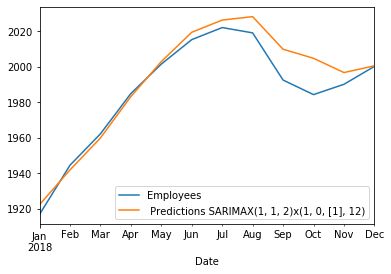

In [30]:
test['Employees'].plot(legend=True)
predictions.plot(legend=True)

### 7. Нарисуйте графики прогнозируемых и известных значений


[Text(0.5, 0, ''), Text(0, 0.5, 'Thousands of Persons')]

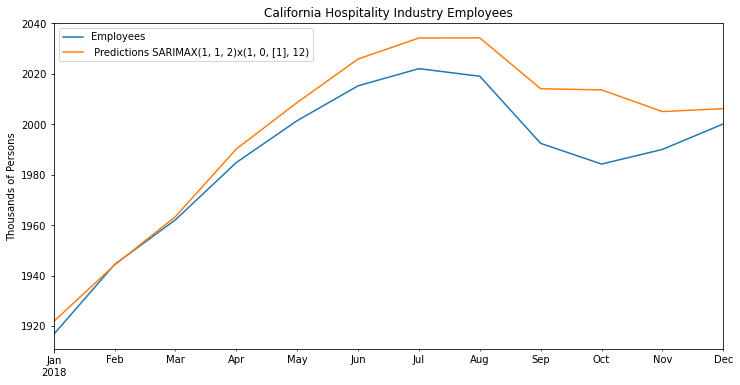

In [62]:
title = 'California Hospitality Industry Employees' #название графика
ylabel = 'Thousands of Persons' #название оси Y
xlabel = '' #по сравнению с ожидаемым результатом не указываем название оси Х


ax = test['Employees'].plot(legend=True, figsize=(12,6),title=title) #добавлем заголовок
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

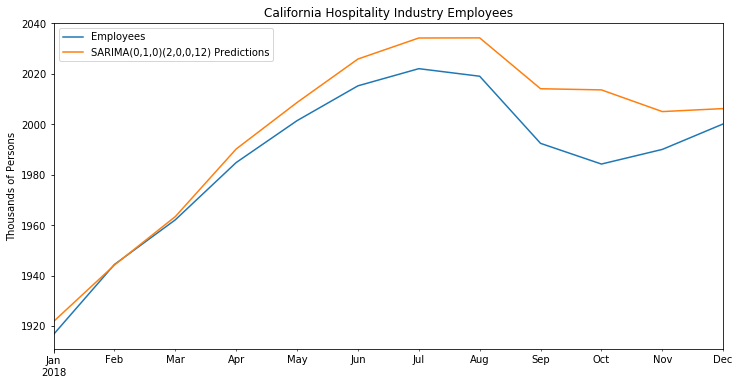

In [64]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

mse_error = mean_squared_error(test['Employees'], predictions)
rmse_error = rmse(test['Employees'], predictions)

print(f'SARIMA(0,1,0)(2,0,0,12) MSE Error: {mse_error:11.10}') 
print(f'SARIMA(0,1,0)(2,0,0,12) RMSE Error: {rmse_error:11.10}')

SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506629
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 13.52222848


### 8. Оцените качество модели с помощью MSE и RMSE


In [65]:
error1 = mean_squared_error(test['Employees'], predictions)
error2 = rmse(test['Employees'], predictions)
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: {error1:11.10}')
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: {error2:11.10}')

SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: 182.8506629
SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: 13.52222848


In [66]:
print(f'SARIMA(0,1,0)(2,0,0,12) MSE Error: {mse_error:11.10}') 
print(f'SARIMA(0,1,0)(2,0,0,12) RMSE Error: {rmse_error:11.10}') 

SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506629
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 13.52222848


### 9. Натренируйте модель на полном датасете и предскажите на год вперед

In [34]:
model = SARIMAX(df['Employees'],order=(1, 1, 2),seasonal_order=(1, 0, 1, 12))
results = model.fit()
results.summary()

/Users/vladimirivanov/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/vladimirivanov/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/vladimirivanov/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Sun, 07 Mar 2021   AIC                           2208.504
Time:                                      09:53:02   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9246      0.045     20.473      0.000       0.836       1.013
ma.L1         -0.9440      0.069    -13.765      0.000      -1.078      -0.810
ma.L2          0.1286      0.058      2.212      0.027       0.015       0.243
ar.S.L12       0.9972      0.001    702.406      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.340      0.000      -0.834      -0.664
sigma2        29.2968      1.717     17.062      0.000      25.931      32.662
===================================================================================
Ljung-Box (Q):                       31.48   Jarque-Bera (JB):                67.46
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
fcast = results.predict(len(df)-1,len(df)+11,typ='levels').rename('SARIMAX(1, 1, 2)x(1, 0, [1], 12) ')

### 10. Постройте график предсказаний и график исходных данных


<AxesSubplot:>

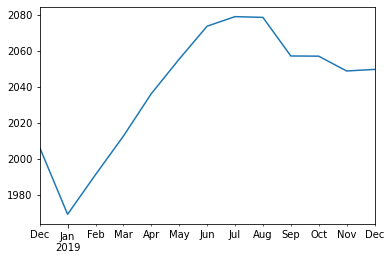

In [69]:
fcast.plot()
# df['Employees'][-1]

[Text(0.5, 0, ''), Text(0, 0.5, 'Thousands of Persons')]

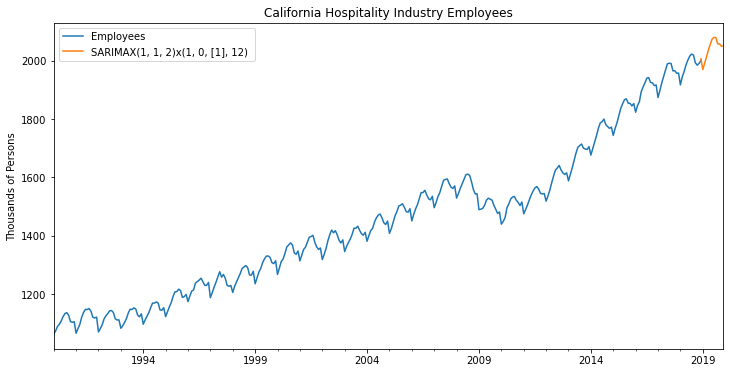

In [71]:
title = 'California Hospitality Industry Employees'
ylabel = 'Thousands of Persons' 
xlabel = '' 


ax = df['Employees'].plot(legend=True, figsize=(12,6),title=title) 
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

### Бонус: воспользуйтесь библиотекой Prophet для предсказания на 1 год вперед

In [72]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [73]:
train.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [74]:
test.head()

,Employees
Date,
2018-01-01,1916.8
2018-02-01,1944.5
2018-03-01,1962.2
2018-04-01,1984.9
2018-05-01,2001.5


In [ ]:
conda install -c conda-forge fbprophet

In [ ]:
from fbprophet import Prophet